In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import os 

In [ ]:
cwd = os.getcwd() 
print(cwd)

In [3]:
data = pd.read_csv("Datasets\\train_and_test2.csv")
data.head(2)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1


In [4]:
data.shape

(1309, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [6]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
zero_list = [col for col in data.columns if '.' in col]
print(zero_list)

['zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18']


In [9]:
data.drop(labels=zero_list, axis=1, inplace=True)
data.drop(columns=['Passengerid','zero'], axis=1, inplace=True)

In [10]:
data.head(2)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1


In [11]:
data.dtypes

Age         float64
Fare        float64
Sex           int64
sibsp         int64
Parch         int64
Pclass        int64
Embarked    float64
2urvived      int64
dtype: object

In [12]:
data['Age'] = data.Age.astype('int64')
data['Fare'] = np.round(data['Fare'], 2) 

In [13]:
data.rename({'2urvived':'Survived'}, axis=1, inplace=True)

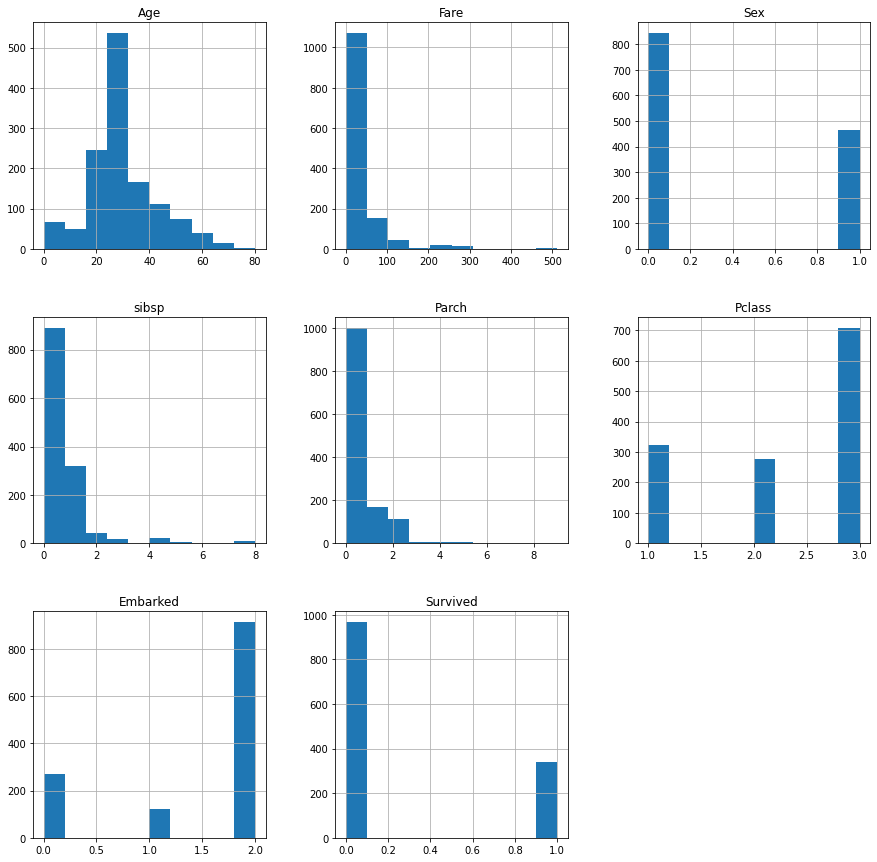

In [35]:
# for i, col in enumerate(data.columns):
#     plt.figure(i)
#     data[col].hist(figsize=(12, 6))
#     plt.xlabel(col)
#     plt.title(f"Distribution of {col}")
data.hist(figsize=(15, 15));

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

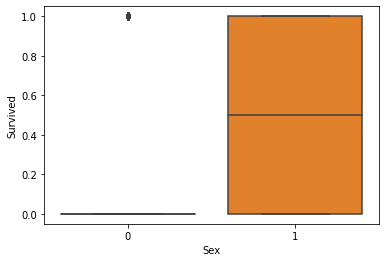

In [27]:
sns.boxplot(data=data, x='Sex', y='Survived')

<AxesSubplot:>

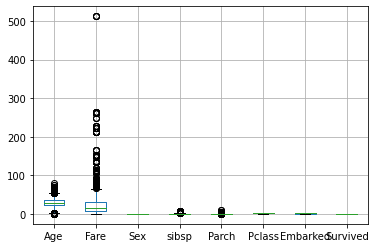

In [29]:
data.boxplot()

In [36]:
data.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    2
Survived    0
dtype: int64

Data Modeling 

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
data['Embarked'] = data.Embarked.fillna(data['Embarked'].mode()[0])

In [40]:
embark = pd.get_dummies(data['Embarked'])
data.drop(['Embarked'], axis=1, inplace=True)

In [41]:
pd.concat([data, embark], axis=1)

,Age,Fare,Sex,sibsp,Parch,Pclass,Survived,0.0,1.0,2.0
0,22,7.25,0,1,0,3,0,0,0,1
1,38,71.28,1,1,0,1,1,1,0,0
2,26,7.92,1,0,0,3,1,0,0,1
3,35,53.10,1,1,0,1,1,0,0,1
4,35,8.05,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,28,8.05,0,0,0,3,0,0,0,1
1305,39,108.90,1,0,0,1,0,1,0,0
1306,38,7.25,0,0,0,3,0,0,0,1
1307,28,8.05,0,0,0,3,0,0,0,1


In [42]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
logr = LogisticRegression() 
logr.fit(X_train, y_train)

LogisticRegression()

In [47]:
log_predictions = logr.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       318
           1       0.68      0.41      0.51       114

    accuracy                           0.79       432
   macro avg       0.75      0.67      0.69       432
weighted avg       0.78      0.79      0.78       432





c:\users\ana jones\pycharmprojects\jupyter\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


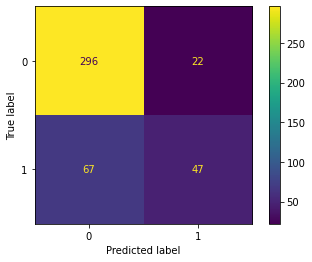

In [56]:
print(classification_report(y_test, log_predictions))
print('\n')
print(plot_confusion_matrix(logr, X_test, y_test))
